In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)


opciones.binary_location = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"
chrome_driver_binary = "/usr/local/bin/chromedriver"

opciones.headless=False    # si True, no aperece la ventana (headless=no visible)


opciones.add_argument("--start-maximized")         # comienza maximizado

opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies

#opciones.add_extension('driver_folder/adblock.crx')       # adblocker

opciones.add_argument('--incognito')              # incognito
#modal-policy > ul > li:nth-child(1) > button

In [3]:
# download the driver 
driver = webdriver.Chrome(ChromeDriverManager().install(), options = opciones)

# set the url
url2 = "https://en.wikipedia.org/wiki/List_of_chess_grandmasters"
nombre = []
nacimiento = []
pais = []

# request the url
driver.get(url2)

driver.implicitly_wait(500) # is like a time.sleep but specific of selenium
for i in range (1,1954):
    
    
    nombre.append(driver.find_element_by_css_selector(f"#grandmasters > tbody > tr:nth-child({i}) > td:nth-child(1) > a").text)
    pais.append(driver.find_element_by_css_selector(f"#grandmasters > tbody > tr:nth-child({i}) > td:nth-child(7)").text)
    nacimiento.append(driver.find_element_by_css_selector(f"#grandmasters > tbody > tr:nth-child({i}) > td:nth-child(3)").text)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/macniacos/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
<ipython-input-3-35402cd164cb>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options = opciones)
<ipython-input-3-35402cd164cb>:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  nombre.append(driver.find_element_by_css_selector(f"#grandmasters > tbody > tr:nth-child({i}) > td:nth-child(1) > a").text)
<ipython-input-3-35402cd164cb>:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  pais.append(driver.find_element_by_css_selector(f"#grandmasters > tbody > tr:nth-child({i}) > td:nth-child(7)").text)
<ipython-input-3-35402cd164cb>:19: DeprecationWarn

In [4]:
nombre = pd.DataFrame(nombre)
nacimiento = pd.DataFrame(nacimiento)
país = pd.DataFrame(pais)

nombre = nombre.rename(columns={0: 'Nombre'})
nacimiento = nacimiento.rename(columns={0: 'Nacimiento'})
país = país.rename(columns={0: 'País'})

In [5]:
df = pd.concat([nombre, nacimiento, país], axis=1)

In [6]:
df.head()

,Nombre,Nacimiento,País
0,"Aagaard, Jacob",1973-07-31,Denmark
1,"Abasov, Nijat",1995-05-14,Azerbaijan
2,"Abbasifar, Hasan",1972-09-12,Iran
3,"Abbasov, Farid",1979-01-31,Azerbaijan
4,"Abdumalik, Zhansaya",2000-01-12,Kazakhstan


In [7]:
df['year'] = pd.DatetimeIndex(df['Nacimiento']).year
df['month'] = pd.DatetimeIndex(df['Nacimiento']).month
df['day'] = pd.DatetimeIndex(df['Nacimiento']).day
df.head(3)

,Nombre,Nacimiento,País,year,month,day
0,"Aagaard, Jacob",1973-07-31,Denmark,1973,7,31
1,"Abasov, Nijat",1995-05-14,Azerbaijan,1995,5,14
2,"Abbasifar, Hasan",1972-09-12,Iran,1972,9,12


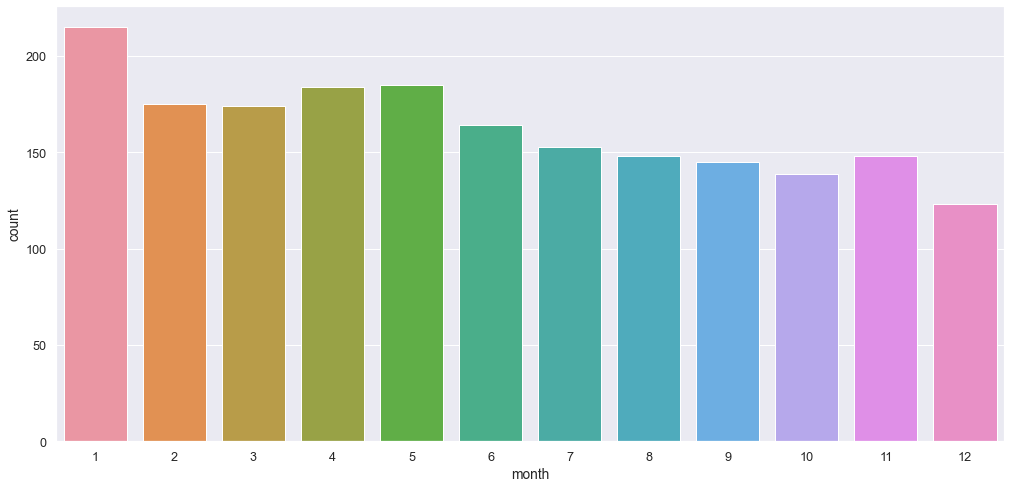

In [8]:
ax = sns.countplot(x="month", data=df)

In [9]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4     

In [10]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [ ]:
df.to_csv('../../Data/ajedrecistas.csv', encoding='utf-8')

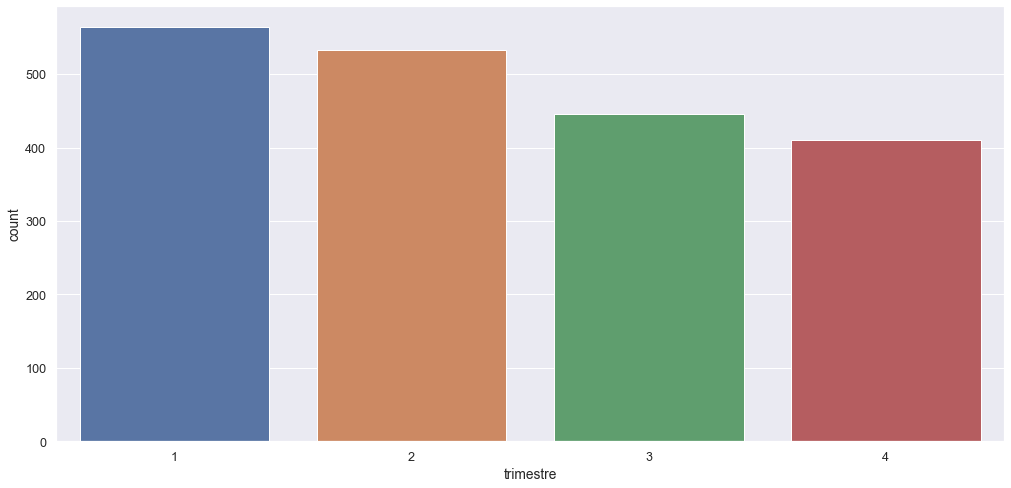

In [37]:
ax = sns.countplot(x="trimestre", data=df)